In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import random

# P Value Test

In [2]:
avocado = pd.read_csv('avocado.csv')

In [3]:
list(avocado.columns.values)

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [4]:
organic = avocado.loc[avocado['type']=='organic']
not_organic = avocado.loc[avocado['type']=='conventional']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


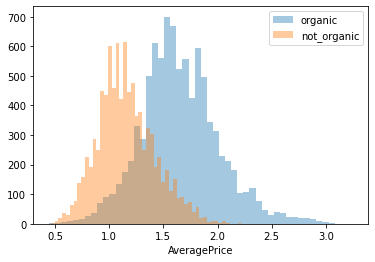

In [5]:
sn.distplot(organic['AveragePrice'], kde=False, label = 'organic')
sn.distplot(not_organic['AveragePrice'], kde=False, label = 'not_organic')
plt.legend()
plt.show()

In [6]:
observed_test_stats = np.mean(organic['AveragePrice']-np.mean(not_organic['AveragePrice']))

In [7]:
observed_test_stats

0.4959590177573935

In [8]:
avocado['AveragePrice'].sample(frac=1).reset_index(drop = 'conventional')

0        1.59
1        1.09
2        0.82
3        1.43
4        1.65
         ... 
18244    1.23
18245    1.44
18246    1.79
18247    0.99
18248    1.92
Name: AveragePrice, Length: 18249, dtype: float64

In [9]:
def perm (data):
    return data.sample(frac=1).reset_index(drop = 'conventional')

In [68]:
sim_test_stat = np.array([])

reps=19000


In [69]:
for i in range(reps):
    perm_info = perm(avocado['AveragePrice'])
    
    df = pd.DataFrame({'Permuted Price':perm_info, 'type':avocado['type']})
    
    organic = df.loc[df['type']=='organic', 'Permuted Price']
    not_organic = df.loc[df['type']=='conventional', 'Permuted Price']
    
    stat = np.mean(organic)-np.mean(not_organic)
    
    sim_test_stat = np.append(sim_test_stat, stat)

In [70]:
sim_test_stat

array([-0.00982871, -0.0015499 ,  0.00813611, ...,  0.00626203,
        0.00017951, -0.00144688])

In [71]:
p_value = np.count_nonzero(sim_test_stat <= observed_test_stats) /reps

In [72]:
p_value

1.0

In [73]:
#0.05<p_value - fail to reject the null hypothesis
#Fail to reject the null hypothesis (H0). In conclusion there is NOT enough evidence to support the alternative claim (H1).

#0.05>p_value - reject the null hypothesis
#Reject the null hypothesis (H0). In conclusion there is enough significant statistical evidence to support the alternative claim (H1).


# Bootstrap Confidence Interval

In [26]:
np.random.choice(organic, size = len(organic))

array([1.21, 1.24, 1.55, ..., 0.83, 1.91, 1.68])

In [27]:
np.random.choice(not_organic, size = len(not_organic))

array([1.13, 0.76, 1.61, ..., 0.98, 1.84, 1.17])

In [28]:
def resample(orig_sample, reps):
    return np.random.choice(orig_sample, size = len(orig_sample))

In [29]:
def bootstrap(orig_sample, reps):
    means = np.array([])
    
    for i in range(reps):
        new_sample = resample(orig_sample, int)
        new_mean = np.mean(new_sample)
        means = np.append(means, new_mean)
    return means

In [32]:
organic_means = bootstrap(organic, 19000)
not_organic_means = bootstrap(not_organic, 19000)
estimates = organic_means - not_organic_means

In [33]:
estimates

array([0.00039831, 0.00939939, 0.00377391, ..., 0.00952547, 0.01497561,
       0.00695919])

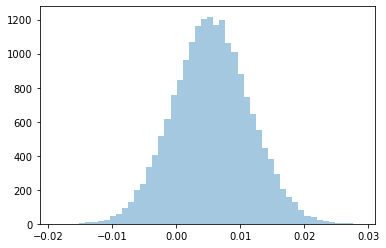

In [34]:
sn.distplot(estimates, kde=False)
plt.show()

In [35]:
(np.percentile(estimates, 2.5), np.percentile(estimates, 97.5))

(-0.0061292004018712876, 0.017447056690998435)

In [36]:
# with 95% confidence, the population's mean difference in Average Price between organic avocados and conventional avocado, is between about ___, and ___.